<a href="https://www.kaggle.com/code/mmqmaram/data-science-imdb-task?scriptVersionId=133272115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


**Step 1**

In order to study and analyse some data we first need to get those data from some file.

in this task we got our data from a comma separated file (CSV)

In [2]:
#step 1
imdb_path = '../input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv'
imdb_data = pd.read_csv(imdb_path)

**Step 2**
we need to clean our data and make it more organized and relatable.

so we need to know our data and check the percentage of the null values so that we can decide how to deal with it.
Also,we need to decide which columns has small to no effect on the output that we need .


In [3]:
#step 2
data_shape=imdb_data.shape
data_size=imdb_data.size
print(data_shape)
print(data_size)
print(imdb_data.isnull().sum())
imdb_data.head()


#we can see that null values are a very small percentage (around 0.025 %) so we can drop them
imdb_data.dropna(inplace=True)

#removing unnecessary columns
cols = ['Poster_Link','Released_Year','Certificate','Runtime','Overview']

imdb_data.drop(columns=cols,inplace=True)
imdb_data

(1000, 16)
16000
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


,Series_Title,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,Kelly's Heroes,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,The Jungle Book,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,A Hard Day's Night,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


**Step 3**
we want to identify the most popular genre of movies and TV shows.

In [4]:
#step 3
imdb_data['Genre'].value_counts()
post_popular_genre = imdb_data['Genre'].value_counts().head(1)
print(post_popular_genre)

Drama    58
Name: Genre, dtype: int64


**Step 4**
From step 3 we lnow that Drama is the favourite genre on imdb.
now in Step 4 : we want to create a new dataframe containing the count of movies/TV shows in each genre .

In [5]:
#step 4
Genre_df = imdb_data.Genre.value_counts()

Genre_df

Drama                         58
Drama, Romance                26
Comedy, Drama                 24
Crime, Drama, Thriller        22
Action, Adventure, Sci-Fi     21
                              ..
Crime, Film-Noir, Thriller     1
Drama, Film-Noir, Romance      1
Drama, History, Romance        1
Adventure, Horror, Sci-Fi      1
Comedy, Music, Musical         1
Name: Genre, Length: 172, dtype: int64


**Step 5**
we now want to visualize the data using a bar chart to show the most popular genre of movies/TV shows using pandas and the matplotlib library.
visualization is very important as it is an obvious representation of information,and allows everyone to comprehend big amount of data in a glance.

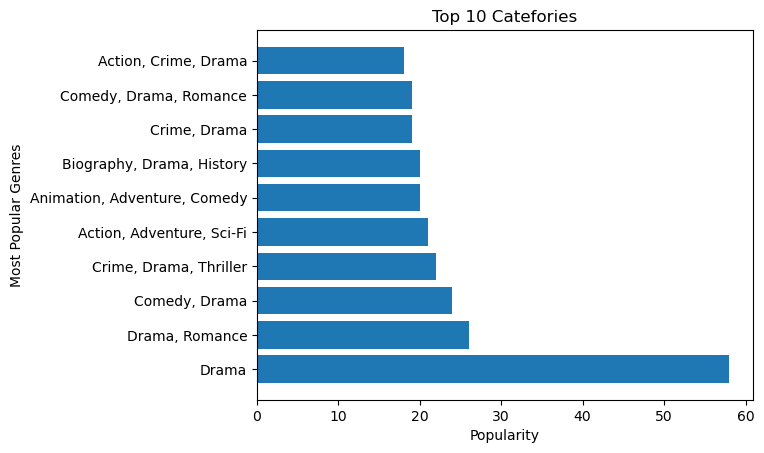

In [6]:
#step 5
import matplotlib.pyplot as mpl

movies = Genre_df[0:10].index
count = list(Genre_df.iloc[:10])

mpl.barh(movies,count)
mpl.ylabel("Most Popular Genres")
mpl.xlabel("Popularity")
mpl.title("Top 10 Catefories")
mpl.show()

**Step 6**
in the previous bar chart we saw how it is very obvious that the Drama category is the most popular, we can clearly see the power of visualization.

now we want to identify the best director (with the most top-rated movies/TV shows).

In [7]:
#step 6
Director_df = imdb_data.Director.value_counts()
Director_df

Steven Spielberg        13
Martin Scorsese         10
Alfred Hitchcock         9
Christopher Nolan        8
Clint Eastwood           8
                        ..
Jon Favreau              1
Yimou Zhang              1
Danis Tanovic            1
Shin'ichirô Watanabe     1
Richard Lester           1
Name: Director, Length: 402, dtype: int64

**#step 7**
we can see from step 6 that steven spienlberg is the winner here.
Now we want to use visualization again but on directors this time.

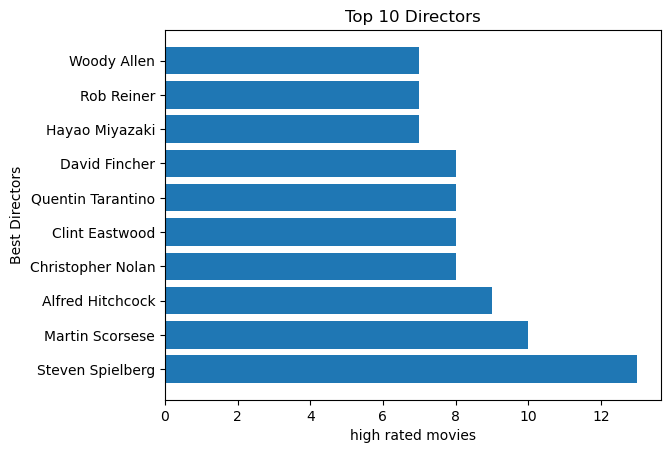

In [8]:
#step 7
directors = Director_df[0:10].index
counter = list(Director_df.iloc[:10])
mpl.barh(directors,counter)
mpl.ylabel("Best Directors")
mpl.xlabel("high rated movies")
mpl.title("Top 10 Directors")
mpl.show()

Again ,here we can see how much visualization and bar charts makes it easier to track and compare data.

**Step 8**
finally , we got the data and charts .
Before starting the task, I have expected that it will be more about fitting models and training the data ..etc , However data analysis is an important topic too.

my answers might be not the best optimized solution, as I'm still in the beginig of this field , and I'm eagre to dive deep in it.it was a nice task which mainly showed the power of visualization and data analysis, I like visualization alot because it is similar to how my mind works.,I always think and even write my notes as conceptual maps.

Thank you (GSG) for your taking the initiative to support the tech field in plaestine.